<a href="https://colab.research.google.com/github/mazenbuk/Sistem-Rekomendasi-Film/blob/main/AI2023_E7_Sistem_Rekomendasi_Film.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sistem Rekomendasi Film Berbasis Konten dengan Pendekatan Rule-Based Reasoning Menggunakan Cosine Similarity**

---


**Oleh Kelompok 7 Kecerdasan Buatan E (AI2023_E7)**

Anggota Kelompok:
1.  I Wayan Ivan Zenatmaja - 225150207111020
2.  Muhammad Hasan Fadhlillah - 225150207111026
3.  Muhammad Husain Fadhlillah - 225150207111027
4.  Hilda Tri Fatikasari Hilal - 225150207111023
5.  M. Arsya Zain Yashifa - 225150200111008








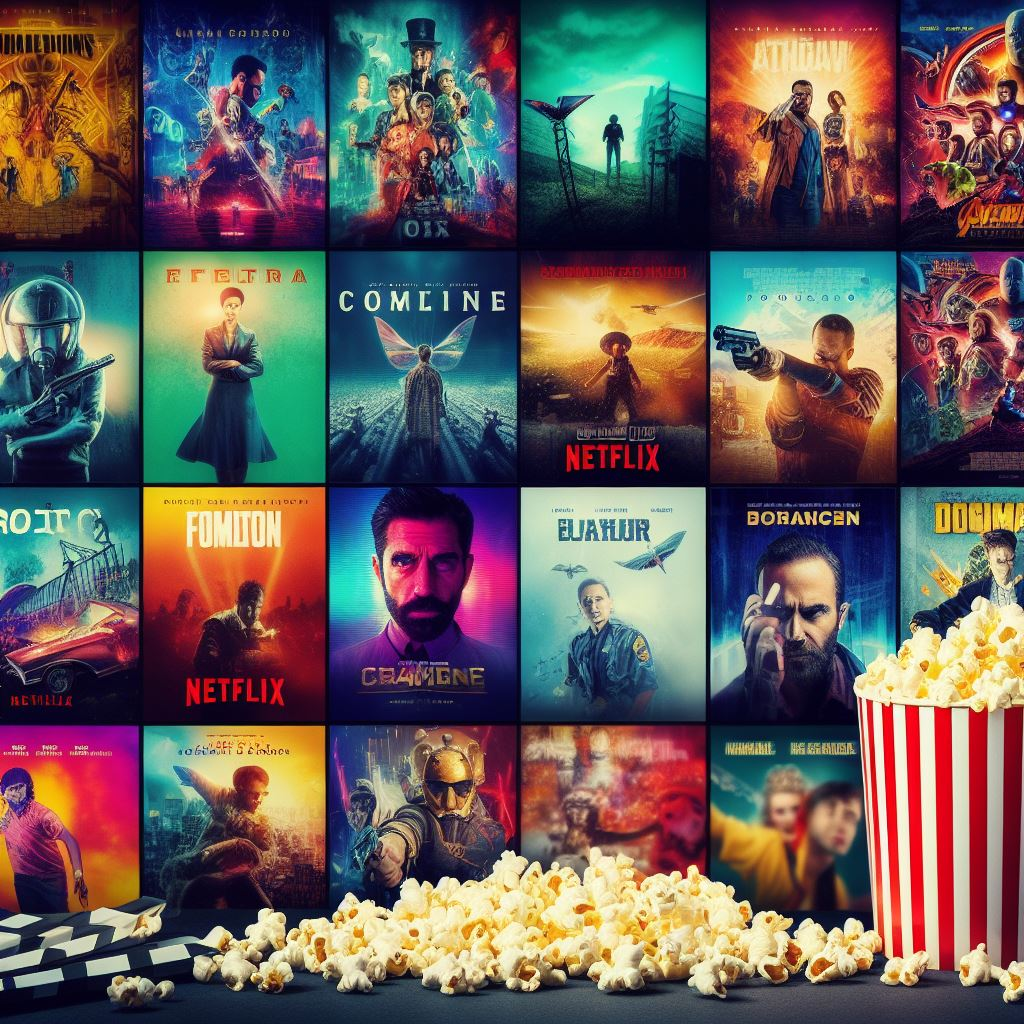

### **Dataset yang digunakan**

Judul: IMDB Movies Dataset (Top 1000 Movies by IMDB Rating)

Source: Kaggle

Link: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

### **Import Library yang Dibutuhkan**

In [ ]:
# Imprort library yang dibutuhkan
import pandas as pd  # Library untuk manipulasi data dalam bentuk tabel
import numpy as np  # Library untuk operasi matematika dan array
from sklearn.metrics.pairwise import cosine_similarity  # Fungsi untuk menghitung kesamaan kosinus antar vektor
from sklearn.feature_extraction.text import TfidfVectorizer  # Fungsi untuk mengonversi teks menjadi representasi vektor TF-IDF
from mlxtend.frequent_patterns import apriori, association_rules  # Fungsi untuk analisis aturan asosiasi
from mlxtend.preprocessing import TransactionEncoder  # Fungsi untuk encoding data transaksi
import warnings  # Library untuk mengelola peringatan
warnings.filterwarnings('ignore')  # Mengabaikan peringatan yang mungkin muncul selama eksekusi program

---
### **Membaca Dataset imdb_top_1000.csv**

In [ ]:
# Membaca dataset
file_path = 'https://drive.google.com/uc?export=download&id=14LufyQ3lBtCZzS-FkXwHCK20Rsd5hGeP' # dataset imdb_top_1000.csv
full_data = pd.read_csv(file_path)

---
### **Menampilkan 5 baris data teratas dari dataset (indeks 0 - 4)**

In [ ]:
# Menampilkan 5 baris data teratas dari dataset (indeks 0 - 4)
full_data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


---
### **Melihat tipe data dari setiap fitur / kolom**

In [ ]:
# Melihat tipe data dari setiap fitur
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


---
### **Melihat statistik deskriptif data**

In [ ]:
# Melihat statistik deskriptif data
full_data.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


---
### **Melihat dimensi data**

In [ ]:
# Melihat dimensi data
full_data.shape

(1000, 16)

Disini dapat kita lihat bahwa dataset memiliki dimensi 1000 baris dan 16 kolom

---
### **Mengambil fitur yang dibutuhkan dan menampilkannya (kolom Series_Title dan Genre) serta menampilkannya**

In [ ]:
# Mengambil fitur yang dibutuhkan dan menampilkannya
data = full_data[['Series_Title', 'Genre']]
print(data)

                 Series_Title                     Genre
0    The Shawshank Redemption                     Drama
1               The Godfather              Crime, Drama
2             The Dark Knight      Action, Crime, Drama
3      The Godfather: Part II              Crime, Drama
4                12 Angry Men              Crime, Drama
..                        ...                       ...
995    Breakfast at Tiffany's    Comedy, Drama, Romance
996                     Giant            Drama, Western
997     From Here to Eternity       Drama, Romance, War
998                  Lifeboat                Drama, War
999              The 39 Steps  Crime, Mystery, Thriller

[1000 rows x 2 columns]


---
### **Mengecek missiing value / null value dalam setiap kolom**

In [ ]:
# Mengecek missiing value / null value dalam data
data.isnull().sum()

Series_Title    0
Genre           0
dtype: int64

Disini dapat kita lihat bahwa tidak terdapat missing value dalam data.

---
### **Mengecek seberapa banyak data yang duplikat**

In [ ]:
# Mengecek duplikasi dalam data
data.duplicated().sum()

0

Disini dapat kita lihat bahwa tidak ada data yang duplikat.

---
### **Metode Cosine Similarity mengambil referensi daripada :**

* **"Perancangan Sistem Rekomendasi Film menggunakan metode Content-based Filtering" karya Evan Salim, Jeanny Pragantha, Manatap Dolok Lauro** yang telah diterbitkan oleh Universitas Tarumanegara

* **"Building a movie content based recommender using tf-idf" karya Alexandre Escolà Nixon** yang telah dipublikasikan di platform *Medium* Towards Data Science Inc

* **"Netflix Recommendation System based on TF-IDF and Cosine
Similarity Algorithms" karya Mohamed Chiny, Marouane Chihab, Omar Bencharef, dan Younes Chihab** yang telah dipublikasikan di platform ResearchGate

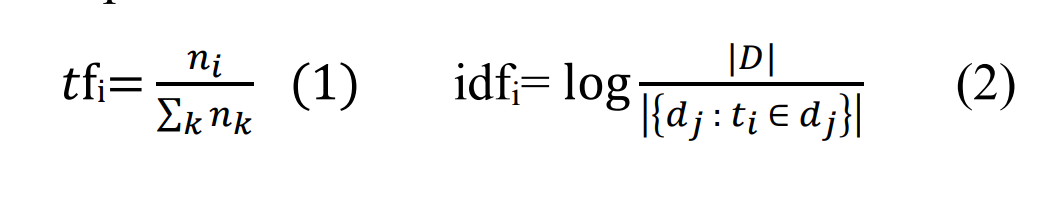

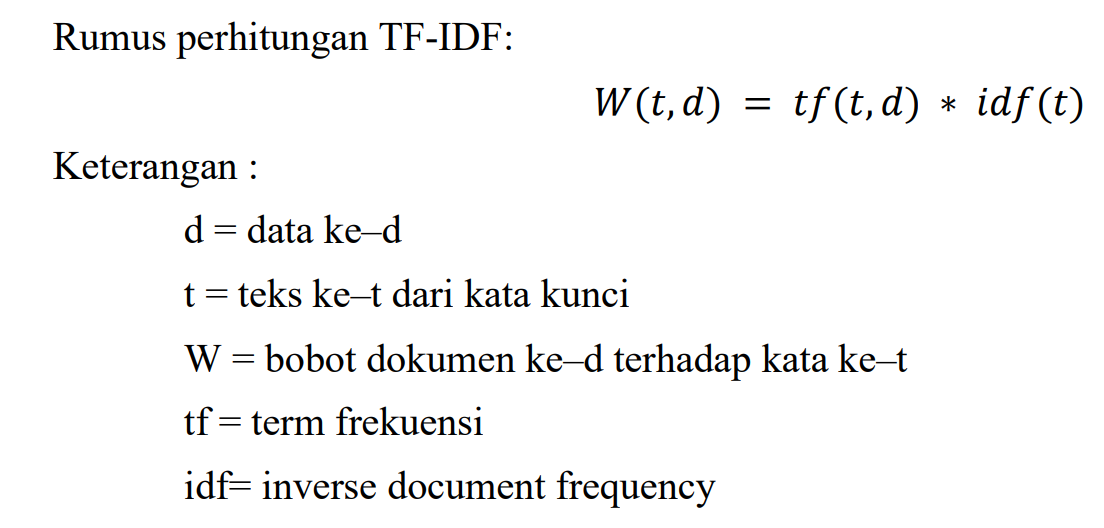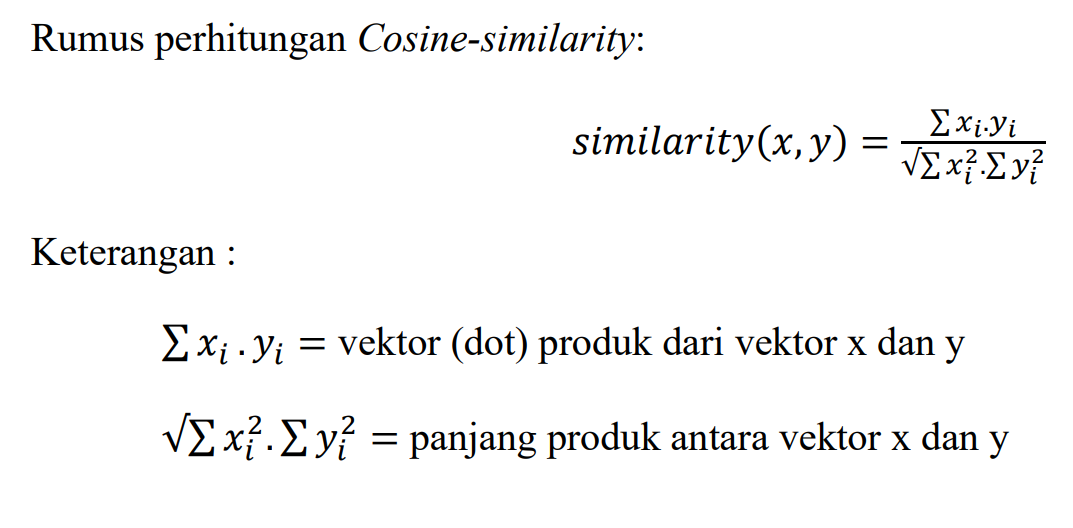

---
### **Menggunakan TF-IDF untuk representasi teks genre**

In [ ]:
# Menggunakan TF-IDF untuk representasi teks genre
genre_list = data["Genre"].tolist()
title = data["Series_Title"].tolist()

# Membuat objek TF-IDF Vectorizer dengan menghilangkan stop words berbahasa Inggris
tfidf = TfidfVectorizer(stop_words='english')

# Menghitung dan menyimpan matriks TF-IDF dari teks genre
tfidf_matrix = tfidf.fit_transform(genre_list)

# Menampilkan informasi perhitungan TF-IDF
print("Perhitungan TF-IDF")
print(tfidf_matrix)

Perhitungan TF-IDF
  (0, 6)	1.0
  (1, 5)	0.8885580770948094
  (1, 6)	0.4587641481519396
  (2, 0)	0.6783582835202396
  (2, 5)	0.652851404491122
  (2, 6)	0.33706836522201766
  (3, 5)	0.8885580770948094
  (3, 6)	0.4587641481519396
  (4, 5)	0.8885580770948094
  (4, 6)	0.4587641481519396
  (5, 1)	0.6620485877906062
  (5, 0)	0.6711715071635197
  (5, 6)	0.3334973393841596
  (6, 5)	0.8885580770948094
  (6, 6)	0.4587641481519396
  (7, 11)	0.744149119143748
  (7, 3)	0.6175938148655292
  (7, 6)	0.2545976596856819
  (8, 9)	0.5747675067449369
  (8, 18)	0.5747675067449369
  (8, 1)	0.40904862180421186
  (8, 0)	0.4146852437457747
  (9, 6)	1.0
  (10, 1)	0.6620485877906062
  (10, 0)	0.6711715071635197
  :	:
  (991, 21)	0.7403395084872273
  (991, 4)	0.4589687419707524
  (991, 1)	0.4911670856914942
  (992, 7)	0.6628000936820877
  (992, 2)	0.5983685590359726
  (992, 1)	0.4501678613275602
  (993, 15)	0.7116052830753143
  (993, 20)	0.6422272141549435
  (993, 6)	0.28488967425668843
  (994, 14)	0.7103378067838

---
### **Menghitung Cosine Similarity**

In [ ]:
# Menghitung Cosine Similarity
similarity = cosine_similarity(tfidf_matrix)

# Menampilkan informasi perhitungan Cosine Similarity
print("Perhitungan Cosine Similarity")
print(similarity)

Perhitungan Cosine Similarity
[[1.         0.45876415 0.33706837 ... 0.25523548 0.31696377 0.        ]
 [0.45876415 1.         0.73473127 ... 0.11709289 0.14541161 0.44329292]
 [0.33706837 0.73473127 1.         ... 0.08603181 0.10683846 0.32570117]
 ...
 [0.25523548 0.11709289 0.08603181 ... 1.         0.80525129 0.        ]
 [0.31696377 0.14541161 0.10683846 ... 0.80525129 1.         0.        ]
 [0.         0.44329292 0.32570117 ... 0.         0.         1.        ]]


### **Membuat indeks dari judul film untuk memudahkan pencarian dan membuang data yang duplikat (jika ada)**

In [ ]:
# Membuat indeks dari judul film untuk memudahkan pencarian
indices = pd.Series(data.index, index=data["Series_Title"]).drop_duplicates()

# Menampilkan indeks yang telah dibuat
print(indices)

Series_Title
The Shawshank Redemption      0
The Godfather                 1
The Dark Knight               2
The Godfather: Part II        3
12 Angry Men                  4
                           ... 
Breakfast at Tiffany's      995
Giant                       996
From Here to Eternity       997
Lifeboat                    998
The 39 Steps                999
Length: 1000, dtype: int64


### **Method get_association_rules**

In [ ]:
# Association Rules
def get_association_rules(data, min_support=0.1, min_confidence=0.5):
    # Menggunakan TransactionEncoder untuk mengkonversi data menjadi format biner
    te = TransactionEncoder()
    te_ary = te.fit(data).transform(data)
    df = pd.DataFrame(te_ary, columns=te.columns_)

    # Menggunakan Apriori untuk menemukan itemset yang sering muncul
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

    # Menggunakan Association Rules untuk mendapatkan aturan asosiasi
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

    return rules

In [ ]:
# Menjalankan Association Rules pada data genre
association_rules_data = get_association_rules(data["Genre"].str.split(',').apply(lambda x: [i.strip() for i in x]), min_support=0.05, min_confidence=0.2)
print(association_rules_data)

    antecedents  consequents  antecedent support  consequent support  support  \
0   (Adventure)     (Action)               0.196               0.189    0.083   
1      (Action)  (Adventure)               0.189               0.196    0.083   
2       (Crime)     (Action)               0.209               0.189    0.055   
3      (Action)      (Crime)               0.189               0.209    0.055   
4      (Action)      (Drama)               0.189               0.724    0.077   
5   (Adventure)  (Animation)               0.196               0.082    0.052   
6   (Animation)  (Adventure)               0.082               0.196    0.052   
7      (Comedy)  (Adventure)               0.233               0.196    0.054   
8   (Adventure)     (Comedy)               0.196               0.233    0.054   
9   (Adventure)      (Drama)               0.196               0.724    0.065   
10  (Biography)      (Drama)               0.109               0.724    0.103   
11     (Comedy)      (Drama)

Fungsi `get_association_rules` digunakan untuk menerapkan algoritma aturan asosiasi, khususnya menggunakan metode Apriori, pada data genre film. Pertama, fungsi ini mengonversi data genre menjadi format biner menggunakan `TransactionEncoder`. Setelah itu, digunakan algoritma Apriori untuk menemukan itemset yang sering muncul dengan parameter minimum support yang dapat disesuaikan. Dengan itemset yang ditemukan, fungsi kemudian menerapkan algoritma Association Rules untuk mendapatkan aturan asosiasi dengan parameter minimum confidence yang juga dapat disesuaikan. Hasil aturan asosiasi ini dapat memberikan wawasan tentang pola-pola yang muncul dalam kombinasi genre film, yang dapat digunakan untuk memodifikasi skor rekomendasi.

### **Method get_association_score**

In [ ]:
# Fungsi untuk mendapatkan skor asosiasi berdasarkan aturan asosiasi
def get_association_score(genre, association_rules_data):
    associated_genres = association_rules_data[association_rules_data['antecedents'].apply(lambda x: genre in x)]

    if not associated_genres.empty:
        return associated_genres['confidence'].mean()
    else:
        return 1.0  # Jika tidak ada aturan asosiasi, kembalikan skor 1.0

Fungsi `get_association_score` bertujuan untuk menghitung skor asosiasi berdasarkan aturan asosiasi yang telah ditemukan sebelumnya. Dengan menerima parameter genre dan data aturan asosiasi, fungsi ini mencari aturan asosiasi yang mencakup genre tersebut sebagai bagian dari kondisi (antecedents). Jika terdapat aturan asosiasi yang sesuai, maka fungsi mengembalikan nilai rata-rata confidence dari aturan-aturan tersebut. Confidence mengukur sejauh mana genre tertentu cenderung muncul bersama dengan genre yang diberikan. Jika tidak ada aturan asosiasi yang sesuai, maka fungsi mengembalikan skor default 1.0, menunjukkan bahwa tidak ada modifikasi yang perlu dilakukan pada skor rekomendasi untuk genre tersebut. Skor asosiasi ini kemudian digunakan untuk memodifikasi skor rekomendasi dalam proses penghasilan rekomendasi film.

### **Method recommendation**

In [ ]:
# Method recommendation
def recommendation(user_title, title, similarity, indices, data, association_rules_data):
    n = len(user_title)  # Jumlah film yang sudah ditonton oleh pengguna
    user_index = []  # Index film yang sudah ditonton
    for i in range(n):
        user_index.append(indices[user_title[i]])
    index = indices[title]  # Index film yang akan direkomendasikan
    score = list(enumerate(similarity[index]))

    # Menghitung user score
    user_score = []
    for i in range(n):
        user_score.append(score[user_index[i]])
        # Menghindari merekomendasikan film yang sudah ditonton
        user_score[i][1][user_index[:]] = 0.0

    # Menggunakan aturan asosiasi untuk memodifikasi skor
    for i in range(n):
        user_score[i][1][user_index[:]] = user_score[i][1][user_index[:]] * get_association_score(user_title[i], association_rules_data)

    # Dilakukan enumerasi
    us_list = list(enumerate(user_score))

    # Menghitung total kesamaan kosinus untuk setiap film
    us_sum = [0 for _ in range(len(title))]
    for i in range(n):
        us_sum += us_list[i][1][1]
    us_sum_list = list(enumerate(us_sum))

    # Mengurutkan daftar film yang direkomendasikan
    us_sorted = sorted(us_sum_list, key=lambda x: x[1], reverse=True)
    us_sorted = us_sorted[:10]  # Mengambil 10 film teratas

    return us_sorted

Fungsi `recommendation` bertujuan untuk menghasilkan rekomendasi film berdasarkan film-film yang telah ditonton oleh pengguna. Dengan menerima beberapa parameter seperti judul film yang sudah ditonton, matriks kesamaan kosinus, indeks film, data film, dan aturan asosiasi, fungsi ini pertama-tama menghitung skor kesamaan kosinus antara film yang akan direkomendasikan dan film-film yang sudah ditonton. Selanjutnya, skor tersebut dimodifikasi dengan menggunakan aturan asosiasi untuk memberikan penyesuaian berdasarkan hubungan antar-genre. Setelah mendapatkan skor akhir, fungsi ini mengurutkan dan mengambil 10 film teratas sebagai rekomendasi untuk pengguna. Proses ini memungkinkan pengguna untuk menerima rekomendasi film yang tidak hanya mirip secara konten tetapi juga mempertimbangkan hubungan asosiasi antar-genre.

### **Menampilkan 10 sample film**

In [ ]:
# Menampilkan 10 sample film
print(data.Series_Title.sample(10))

528           Hannah and Her Sisters
704                     Mary Poppins
298                 Inherit the Wind
901                     End of Watch
483                            Amour
923                   La Vie En Rose
431          Per un pugno di dollari
319    Sunrise: A Song of Two Humans
423                   Il conformista
281                     Barry Lyndon
Name: Series_Title, dtype: object


### **Method print_recommendations**

In [ ]:
# Method untuk print hasil rekomendasi
def print_recommendations(user_movies, title, similarity, indices, data, association_rules_data):
    recommendations = recommendation(user_movies, title, similarity, indices, data, association_rules_data)

    print("")
    print("=" * 100)
    print("Top 10 Recommended Movies for '{}':".format(user_movies))
    for idx, (movie_idx, us_sorted) in enumerate(recommendations, start=1):
        movie_title = data['Series_Title'][movie_idx]
        movie_genre = data['Genre'][movie_idx]

        # Informasi tambahan
        movie_info = {
            "Movie Title": movie_title,
            "Recommendation Score": us_sorted,
            "Genre": movie_genre,
            "Released Year": full_data['Released_Year'][movie_idx],
            "Movie Runtime": full_data['Runtime'][movie_idx],
            "IMDB Rating": full_data['IMDB_Rating'][movie_idx],
            "Director": full_data['Director'][movie_idx],
            "Movie Overview": full_data['Overview'][movie_idx]
        }

        print("=" * 100)
        print("Film ke-{}".format(idx))
        for key, value in movie_info.items():
            # Memeriksa apakah yang diakses adalah nilai skor rekomendasi
            if key == "Recommendation Score":
                print("{:<20}: {:<30.4f}".format(key, value))
            else:
                print("{:<20}: {}".format(key, value))

Fungsi `print_recommendations` digunakan untuk mencetak hasil rekomendasi film ke layar. Fungsi ini menerima parameter berupa judul film yang sudah ditonton oleh pengguna, matriks kesamaan kosinus, indeks film, data film, dan aturan asosiasi. Setelah mendapatkan rekomendasi menggunakan fungsi `recommendation`, fungsi ini mencetak informasi terkait film-film yang direkomendasikan, termasuk judul, skor rekomendasi, genre, tahun rilis, durasi, rating IMDB, sutradara, dan overview. Outputnya berupa daftar film beserta informasi tersebut, memberikan pandangan yang lebih rinci tentang alasan di balik setiap rekomendasi.

### **Memasukkan input film yang telah ditonton dan mencetak hasil Top 10 Rekomendasi Film sesuai preferensi pengguna**

In [ ]:
# Mendapatkan judul film dari pengguna
user_movies = input("Masukkan film apa yang telah anda tonton? (NB: Pisahkan input dengan koma): ").split(',')

# Pangkas spasi di depan atau di belakang judul film
user_movies = [movie.strip() for movie in user_movies]

# Mencetak hasil rekomendasi
print_recommendations(user_movies, title, similarity, indices, data, association_rules_data)

Masukkan film apa yang telah anda tonton? (NB: Pisahkan input dengan koma): Toy Story, Office Space

Top 10 Recommended Movies for '['Toy Story', 'Office Space']':
Film ke-1
Movie Title         : Paddington 2
Recommendation Score: 1.0820                        
Genre               : Adventure, Comedy, Family
Released Year       : 2017
Movie Runtime       : 103 min
IMDB Rating         : 7.8
Director            : Paul King
Movie Overview      : Paddington (Ben Whishaw), now happily settled with the Brown family and a popular member of the local community, picks up a series of odd jobs to buy the perfect present for his Aunt Lucy's (Imelda Staunton's) 100th birthday, only for the gift to be stolen.
Film ke-2
Movie Title         : The Goonies
Recommendation Score: 1.0820                        
Genre               : Adventure, Comedy, Family
Released Year       : 1985
Movie Runtime       : 114 min
IMDB Rating         : 7.8
Director            : Richard Donner
Movie Overview      : A group 

### ***Tambahan*: Pengguna dapat melakukan filtering kembali terhadap Top 10 Rekomendasi Film yang telah diberikan dengan memilih genre atau tahun rilis film**

In [ ]:
# Menghitung rekomendasi di tingkat global
recommendations = recommendation(user_movies, title, similarity, indices, data, association_rules_data)

# Ambil indeks film dari rekomendasi
recommended_movie_indices = [idx for idx, _ in recommendations]

# Rangkuman Genre dari Hasil Rekomendasi
print("Rangkuman Genre dari Hasil Rekomendasi:")
print(data['Genre'].loc[recommended_movie_indices].explode().value_counts())

# Rangkuman Tahun Rilis dari Hasil Rekomendasi
print("\nRangkuman Tahun Rilis dari Hasil Rekomendasi:")
print(full_data['Released_Year'].loc[recommended_movie_indices].value_counts())

# Meminta input genre dan tahun rilis dari pengguna
selected_genre = input("\nPilih genre untuk filtering (kosongkan jika tidak ingin): ").strip()
selected_year = input("Pilih tahun rilis untuk filtering (kosongkan jika tidak ingin): ").strip()

# Melakukan filtering hasil rekomendasi
filtered_recommendations = recommendations[:10]

if selected_genre:
    # Filtering berdasarkan genre
    selected_genre_movies = data[data['Genre'].str.contains(selected_genre, case=False)]
    filtered_recommendations = [(movie_idx, us_sorted) for movie_idx, us_sorted in filtered_recommendations if movie_idx in selected_genre_movies.index]

if selected_year:
    # Filtering berdasarkan tahun rilis
    selected_year_movies = full_data[full_data['Released_Year'].astype(str).str.contains(selected_year, case=False)]
    filtered_recommendations = [(movie_idx, us_sorted) for movie_idx, us_sorted in filtered_recommendations if movie_idx in selected_year_movies.index]

# Menampilkan hasil setelah filtering
print("")
print("=" * 100)
print("Recommended Movies after Filtering '{}''{}':".format(selected_genre, selected_year))

if not filtered_recommendations:
    print("=" * 100)
    print("\nMaaf, genre atau tahun rilis yang dimasukkan tidak ada dalam hasil rekomendasi sehingga tidak dapat dilakukan filtering.")
    print("Silakan coba masukkan input filter lainnya.")
else:
    for idx, (movie_idx, us_sorted) in enumerate(filtered_recommendations, start=1):
        movie_title = data['Series_Title'][movie_idx]
        movie_genre = data['Genre'][movie_idx]

        # Informasi tambahan
        movie_info = {
            "Movie Title": movie_title,
            "Recommendation Score": us_sorted,
            "Genre": movie_genre,
            "Released Year": full_data['Released_Year'][movie_idx],
            "Movie Runtime": full_data['Runtime'][movie_idx],
            "IMDB Rating": full_data['IMDB_Rating'][movie_idx],
            "Director": full_data['Director'][movie_idx],
            "Movie Overview": full_data['Overview'][movie_idx]
        }

        print("=" * 100)
        print("Film ke-{}".format(idx))
        for key, value in movie_info.items():
            # Memeriksa apakah yang diakses adalah nilai skor rekomendasi
            if key == "Recommendation Score":
                print("{:<20}: {:<30.4f}".format(key, value))
            else:
                print("{:<20}: {}".format(key, value))

Rangkuman Genre dari Hasil Rekomendasi:
Adventure, Comedy, Drama     5
Adventure, Comedy, Family    3
Drama, Family, Sport         2
Name: Genre, dtype: int64

Rangkuman Tahun Rilis dari Hasil Rekomendasi:
2013    2
2017    1
1985    1
1979    1
1997    1
2007    1
1925    1
2016    1
2000    1
Name: Released_Year, dtype: int64

Pilih genre untuk filtering (kosongkan jika tidak ingin): Sport
Pilih tahun rilis untuk filtering (kosongkan jika tidak ingin): 

Recommended Movies after Filtering 'Sport''':
Film ke-1
Movie Title         : Bacheha-Ye aseman
Recommendation Score: 1.0715                        
Genre               : Drama, Family, Sport
Released Year       : 1997
Movie Runtime       : 89 min
IMDB Rating         : 8.3
Director            : Majid Majidi
Movie Overview      : After a boy loses his sister's pair of shoes, he goes on a series of adventures in order to find them. When he can't, he tries a new way to "win" a new pair.
Film ke-2
Movie Title         : Chak De! India
Rec

Variabel `filtered_recommendations` digunakan untuk menyimpan rekomendasi awal sebelum proses filtering. Pertama, rekomendasi diambil dengan menggunakan fungsi `recommendation`. Selanjutnya, terdapat beberapa langkah filtering yang dilakukan berdasarkan input genre dan tahun rilis dari pengguna. Jika pengguna memberikan input untuk filtering, variabel `filtered_recommendations` akan diperbarui untuk hanya menyertakan film-film yang memenuhi kriteria genre dan tahun rilis yang dimasukkan. Setelah proses filtering selesai, hasilnya akan ditampilkan ke layar. Jika setelah filtering tidak ada rekomendasi yang tersisa, maka program akan memberikan pesan bahwa genre atau tahun rilis yang dimasukkan tidak ada dalam hasil rekomendasi sehingga tidak dapat dilakukan filtering. Sebaliknya, jika ada rekomendasi yang tersisa setelah filtering, informasi detail tentang film-film tersebut akan ditampilkan ke layar.